In [2]:
import pandas as pd

sales=pd.read_csv('data/Cleaned/sales_mod.csv')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

X = sales.drop('Stock_Level', axis=1)
y = sales['Stock_Level']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")

MAE: 14.93
R² Score: 0.40


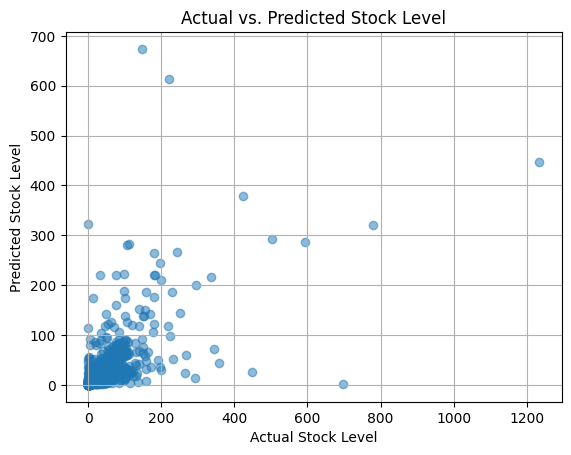

In [8]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Stock Level")
plt.ylabel("Predicted Stock Level")
plt.title("Actual vs. Predicted Stock Level")
plt.grid(True)
plt.savefig('actual_vs_predicted.png')
plt.show()


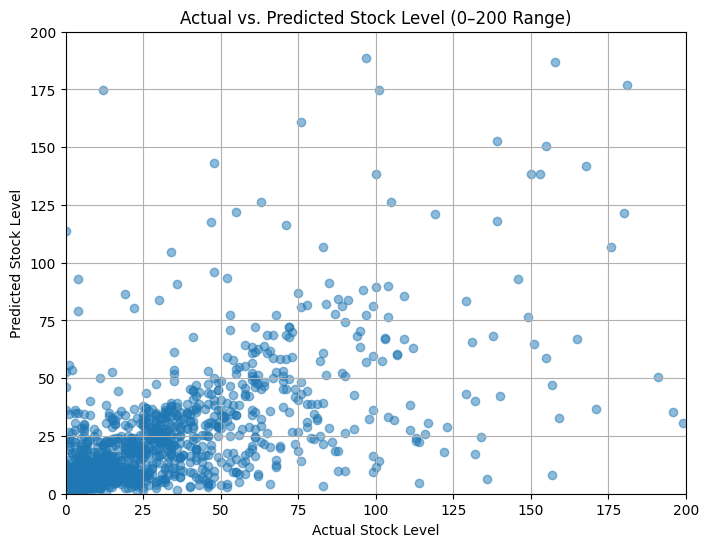

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Stock Level")
plt.ylabel("Predicted Stock Level")
plt.title("Actual vs. Predicted Stock Level (0–200 Range)")
plt.xlim(0, 200)
plt.ylim(0, 200)
plt.grid(True)
plt.savefig('actual_vs_predicted_zoomed.png')
plt.show()



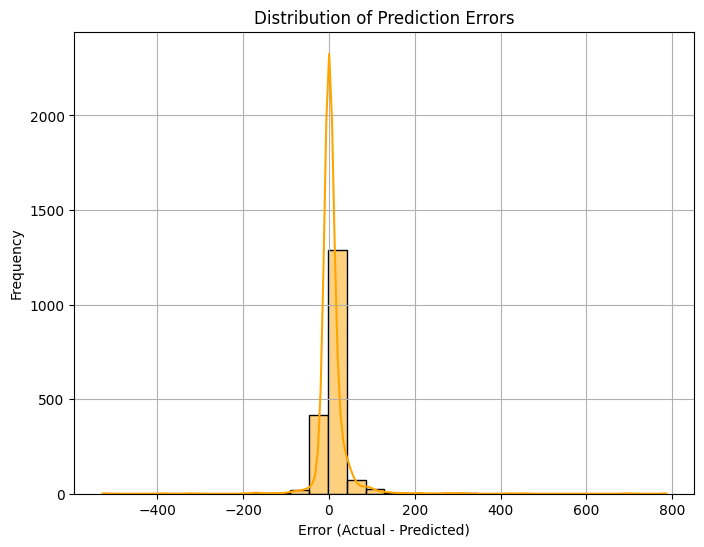

In [10]:
import seaborn as sns
errors = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(errors, bins=30, kde=True, color='orange')
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.savefig('distribution_of_prediction_errors.png')
plt.show()


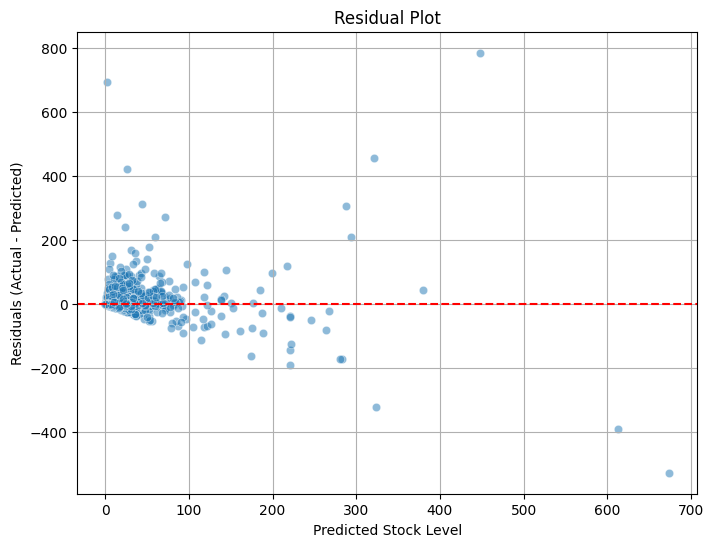

In [12]:
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Stock Level")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.grid(True)
plt.savefig('residual_plot.png')
plt.show()

